<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-05-27-Ensemble/Voting-Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [10]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(dataset.DESCR)

In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 9, test_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

log = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC()

models = [
          ('Logistic', log),
          ('knn', knn),
          ('dt', dt),
          ('NB', nb),
          ('svc', svc)
    ]

In [25]:
from sklearn.ensemble import VotingClassifier

votclf = VotingClassifier(
    estimators = models,
    n_jobs = -1
)

In [26]:
for name, model in models:
    model.fit(xtrain, ytrain)
    print(name, model.score(xtest, ytest))

votclf.fit(xtrain, ytrain)
print('Voting', votclf.score(xtest, ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic 0.9590643274853801
knn 0.9415204678362573
dt 0.935672514619883
NB 0.9415204678362573
svc 0.9064327485380117
Voting 0.9532163742690059


In [33]:
votclf.predict(xtest)
# votclf.predict_proba(xtest)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [30]:
models = [
          ('Logistic', log),
          ('knn', knn),
          ('dt', dt),
          ('NB', nb),
          ('svc', SVC(probability=True))
    ]

votclf = VotingClassifier(
    estimators = models,
    voting='soft',
    n_jobs = -1
)
votclf.fit(xtrain, ytrain)
print('Voting', votclf.score(xtest, ytest))

Voting 0.9532163742690059


# Bagging

In [34]:
## Can ignore this code
## Creating Dataset

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50  # Number of datasets
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_trains = []
y_trains = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_trains.append(X)
    y_trains.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)


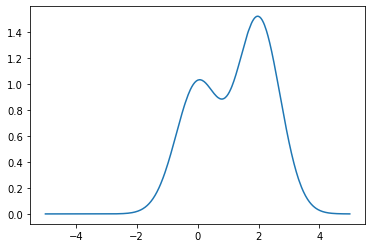

In [35]:
plt.plot(X_test, f(X_test))

In [38]:
len(X_trains), X_trains[0].shape

(50, (50, 1))

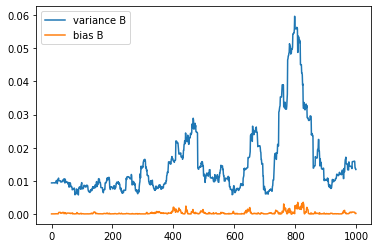

In [39]:
from sklearn.tree import DecisionTreeRegressor
MB = DecisionTreeRegressor() # Base Model

y_pred = np.zeros( (n_test, n_repeat) )

for i in range(n_repeat):
    MB.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = MB.predict(X_test)

varianceB = np.var(y_pred, axis = 1)
biasB = (f(X_test) - np.mean(y_pred, axis = 1))**2

plt.plot(varianceB, label = 'variance B')
plt.plot(biasB, label = 'bias B')
plt.legend()
plt.show()

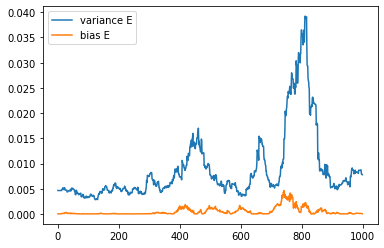

In [44]:
from sklearn.ensemble import BaggingRegressor

ME = BaggingRegressor(DecisionTreeRegressor(), 20) # Base Model

y_pred = np.zeros( (n_test, n_repeat) )

for i in range(n_repeat):
    ME.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = ME.predict(X_test)

varianceE = np.var(y_pred, axis = 1)
biasE = (f(X_test) - np.mean(y_pred, axis = 1))**2

plt.plot(varianceE, label = 'variance E')
plt.plot(biasE, label = 'bias E')
plt.legend()
plt.show()

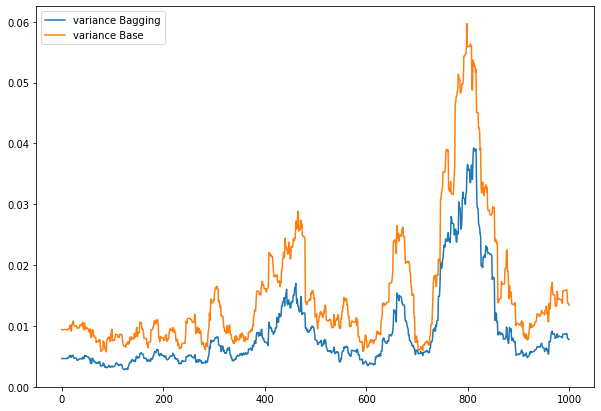

In [46]:
plt.figure(figsize = (10, 7))

plt.plot(varianceE, label = 'variance Bagging')
# plt.plot(biasE, label = 'bias Bagging')
plt.plot(varianceB, label = 'variance Base')
# plt.plot(biasB, label = 'bias Base')
plt.legend()
plt.show()

In [49]:
xtrain, xtest, ytrain, ytest

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)

bag = BaggingClassifier(DecisionTreeClassifier())
bag.fit(xtrain, ytrain)

pas = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False)
pas.fit(xtrain, ytrain)

print('Tree', tree.score(xtest, ytest))
print('Bagging', bag.score(xtest, ytest))
print('pasting', pas.score(xtest, ytest))

Tree 0.9298245614035088
Bagging 0.9707602339181286
pasting 0.935672514619883


  0%|          | 0/9 [00:00<?, ?it/s]

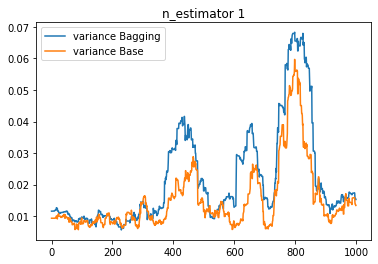

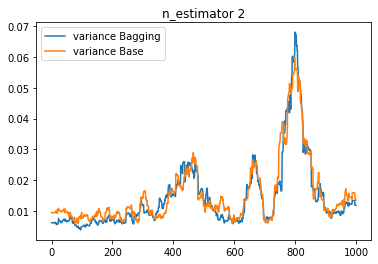

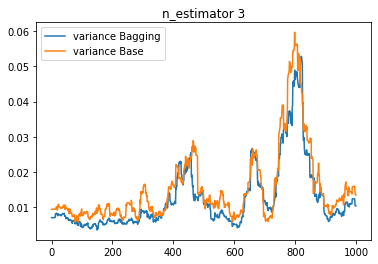

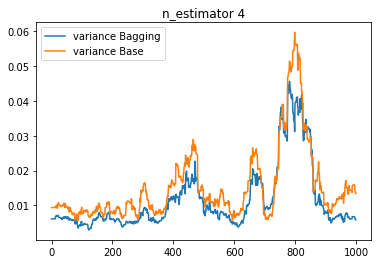

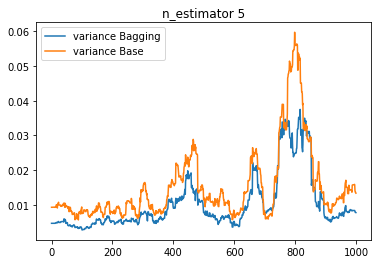

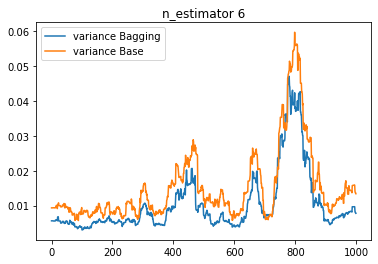

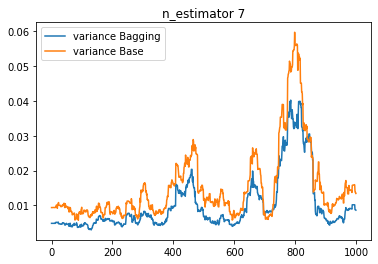

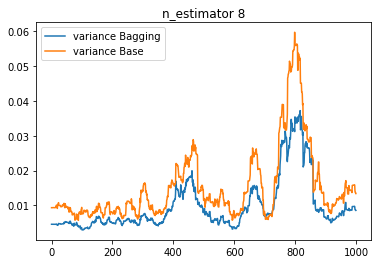

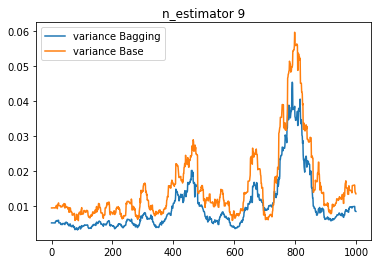

In [53]:
from tqdm.notebook import tqdm

for be in tqdm(range(1, 10)):

    ME = BaggingRegressor(n_estimators=be, n_jobs=-1)

    y_pred = np.zeros( (n_test, n_repeat) )

    for i in range(n_repeat):
        ME.fit(X_trains[i], y_trains[i])
        y_pred[:, i] = ME.predict(X_test)

    varianceE = np.var(y_pred, axis = 1)
    biasE = (f(X_test) - np.mean(y_pred, axis = 1))**2

    plt.title('n_estimator {}'.format(be))
    plt.plot(varianceE, label = 'variance Bagging')
    # plt.plot(biasE, label = 'bias Bagging')
    plt.plot(varianceB, label = 'variance Base')
    # plt.plot(biasB, label = 'bias Base')
    plt.legend()
    plt.show()

In [61]:
from tqdm.notebook import tqdm

ME = BaggingRegressor(DecisionTreeRegressor(), warm_start=True, n_jobs=-1)
ME.n_estimators = 0

train_score = []
test_score = []

  0%|          | 0/29 [00:00<?, ?it/s]

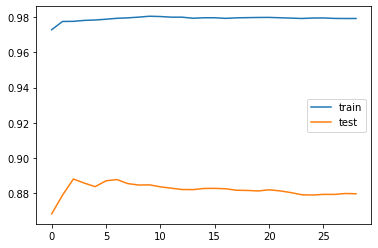

In [62]:
for be in tqdm(range(1, 30)):

    ME.n_estimators += 10

    ME.fit(xtrain, ytrain)

    test_score.append(ME.score(xtest, ytest))
    train_score.append(ME.score(xtrain, ytrain))


plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.show()